In [1]:
import numpy as np
import matplotlib.pyplot as pl
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
survey=pd.read_csv('/Users/rissu/survey_results_public.csv')

In [3]:
survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
survey.shape

(98855, 129)

In [5]:
missing=survey.isnull().sum().reset_index()
missing[0]=missing[0]*100/missing[0].sum()

In [6]:
missing.head()

,index,0
0,Respondent,0.000000
1,Hobby,0.000000
2,OpenSource,0.000000
3,Country,0.009473
4,Student,0.090911


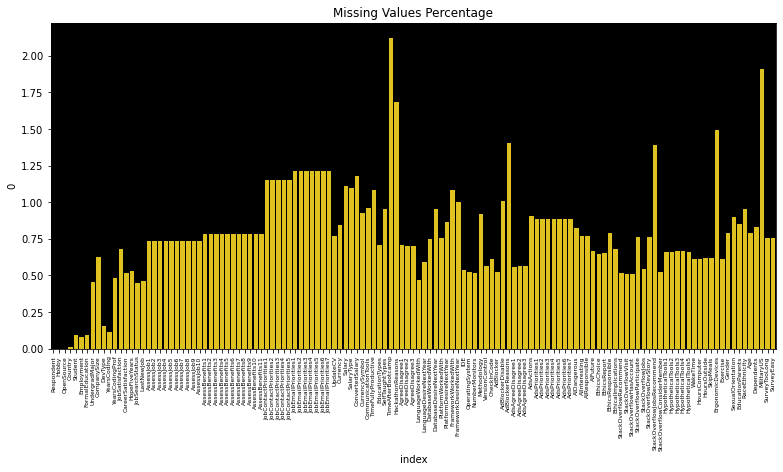

In [7]:
pl.figure(figsize=(13,6))
ax=sns.barplot('index',0,data=missing,color='gold')
pl.xticks(rotation=90,fontsize=6)
ax.set_facecolor('black')
pl.title("Missing Values Percentage")
pl.show()

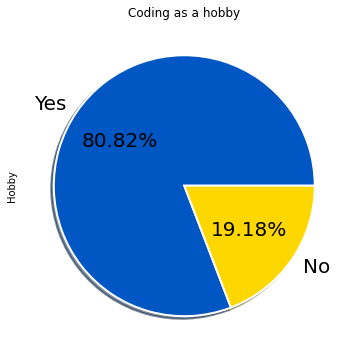

In [8]:
survey['Hobby'].value_counts().plot.pie(figsize=(6,6),autopct='%1.2f%%',
                                       colors=sns.color_palette('prism',3),
                                       shadow=True,
                                        fontsize=20,
                                        wedgeprops={'linewidth':2,
                                                   'edgecolor':'white'}
                                )
pl.title("Coding as a hobby")
pl.show()

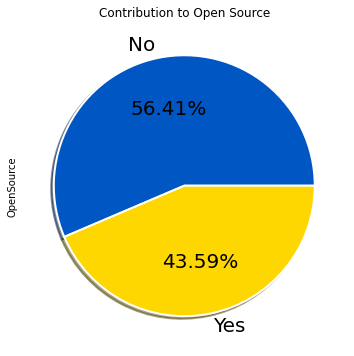

In [9]:
survey['OpenSource'].value_counts().plot.pie(figsize=(6,6),autopct='%1.2f%%',
                                       colors=sns.color_palette('prism',3),
                                       shadow=True,
                                        fontsize=20,
                                        wedgeprops={'linewidth':2,
                                                   'edgecolor':'white'}
                                )
pl.title("Contribution to Open Source")
pl.show()

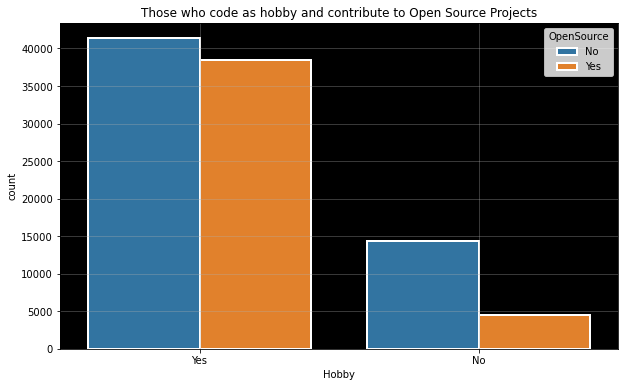

In [10]:
pl.figure(figsize=(10,6))
ax=sns.countplot(data=survey,x='Hobby',hue='OpenSource',
                linewidth=2,
                edgecolor='w')
ax.set_facecolor('black')
pl.grid(alpha=.4)
pl.title('Those who code as hobby and contribute to Open Source Projects')
pl.show()

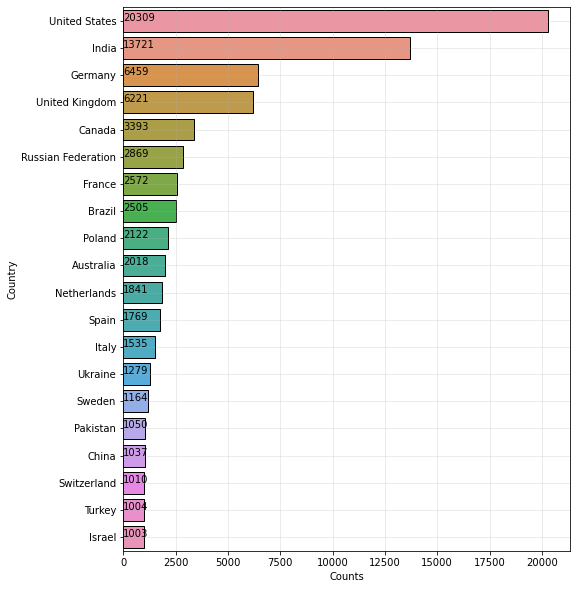

In [11]:
pl.figure(figsize=(8,10))
temp=survey['Country'].value_counts().reset_index()
temp.columns=['Country','Counts']
temp=temp.iloc[:20,:]
ax=sns.barplot(data=temp,x='Counts',y='Country',
              linewidth=1,
              edgecolor='k')
for i,j in enumerate(temp['Counts']):
    ax.text(0,i,j)
pl.grid(alpha=.3)
pl.show()

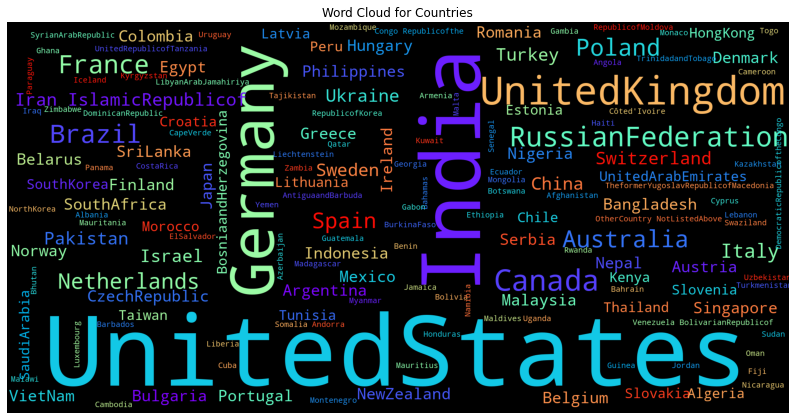

In [12]:
words=survey[survey['Country'].notnull()]['Country'].str.replace(" ","")
wc=WordCloud(background_color='black',colormap='rainbow',scale=5).generate(' '.join(words))
pl.figure(figsize=(14,10))
pl.imshow(wc)
pl.axis('off')
pl.title('Word Cloud for Countries')
pl.show()

In [13]:
countries=pd.read_excel('datasets_26052_33207_countries.xlsx')
countries['country']=countries['country'].replace({"United States of America":"United States",
                                                          "Iran, Islamic Republic of":"Iran, Islamic Republic of...",
                                                          "Hong Kong, SAR China":"Hong Kong (S.A.R.)",
                                                          "Korea (South)":"South Korea",
                                                          "Korea (North)":"North Korea",
                                                          "Venezuela (Bolivarian Republic)":"Venezuela, Bolivarian Republic of...",
                                                          "Tanzania, United Republic of":"United Republic of Tanzania",
                                                          "Taiwan, Republic of China":"Taiwan",
                                                          "Micronesia, Federated States of":"Micronesia, Federated States of...",
                                                          "Congo (Brazzaville)":"Congo, Republic of the...",
                                                          "Congo, (Kinshasa)":"Democratic Republic of the Congo",
                                                           "Libya":"Libyan Arab Jamahiriya",
                                                           "Macedonia, Republic of":"The former Yugoslav Republic of Macedonia",
                                                           "Moldova":"Republic of Moldova",
                                                           "Syrian Arab Republic (Syria)":"Syrian Arab Republic",
                                                           })
country_new=temp.merge(countries,left_on='Country',right_on='country',how='left')


In [14]:
country_new

,Country,Counts,country,two_code,three_code
0,United States,20309,United States,US,USA
1,India,13721,India,IN,IND
2,Germany,6459,Germany,DE,DEU
3,United Kingdom,6221,United Kingdom,GB,GBR
4,Canada,3393,Canada,CA,CAN
5,Russian Federation,2869,Russian Federation,RU,RUS
6,France,2572,France,FR,FRA
7,Brazil,2505,Brazil,BR,BRA
8,Poland,2122,Poland,PL,POL
9,Australia,2018,Australia,AU,AUS


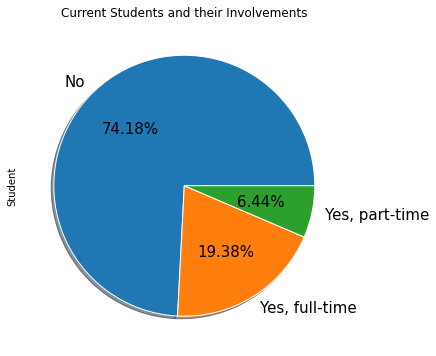

In [15]:
survey['Student'].value_counts().plot.pie(
autopct="%1.2f%%",figsize=(6,6),
    fontsize=15,
    wedgeprops={'linewidth':1,
               'edgecolor':'white'},
    shadow=True
)
pl.title('Current Students and their Involvements')
pl.show()

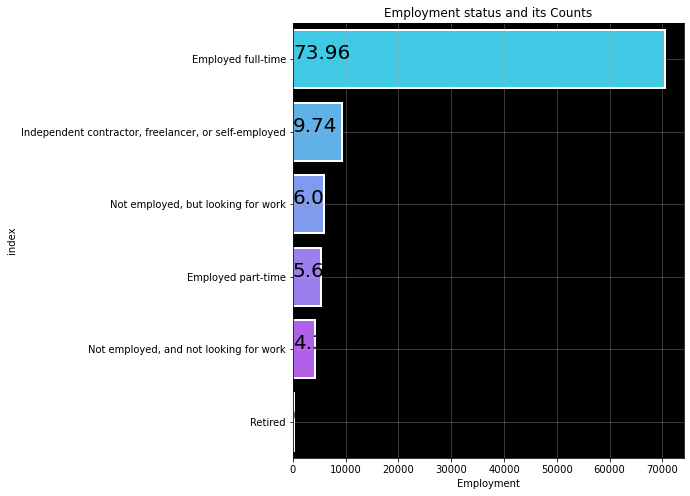

In [16]:
emp=survey['Employment'].value_counts().reset_index()
emp['percnt']=(emp['Employment']/emp['Employment'].sum())*100
emp
pl.figure(figsize=(7,8))
ax=sns.barplot(y='index',x='Employment',data=emp,
              edgecolor='white',
              linewidth=2,
              palette='cool')
ax.set_facecolor('k')
for i,j in enumerate(emp['percnt'].round(2)):
    ax.text(0,i,j,
           fontsize=20)
pl.grid(alpha=.4)
pl.title('Employment status and its Counts')
pl.show()

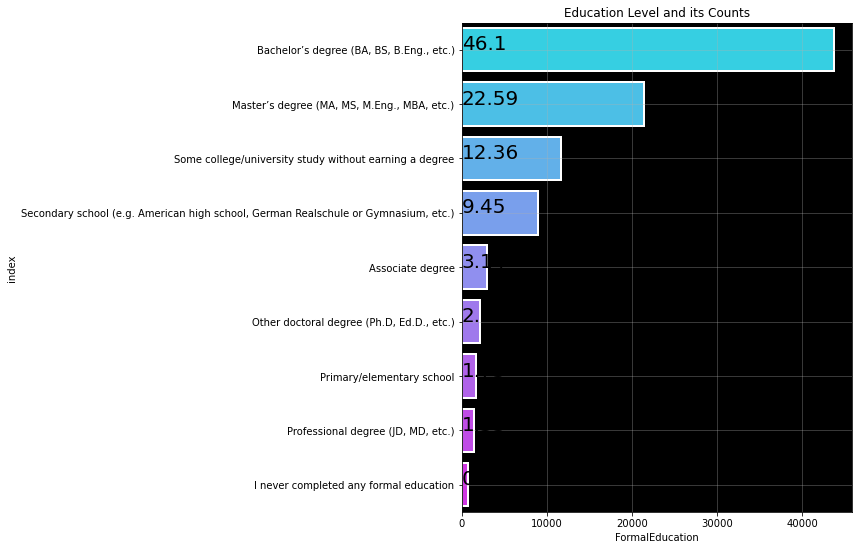

In [17]:
emp=survey['FormalEducation'].value_counts().reset_index()
emp['perct']=emp['FormalEducation']*100/emp['FormalEducation'].sum()
pl.figure(figsize=(7,9))
ax=sns.barplot(y='index',x='FormalEducation',
              data=emp,
              edgecolor='white',
              linewidth=2,
              palette='cool')
ax.set_facecolor('k')
for i,j in enumerate(emp['perct'].round(2)):
    ax.text(0,i,j,
           fontsize=20)
pl.grid(alpha=.4)
pl.title('Education Level and its Counts')
pl.show()

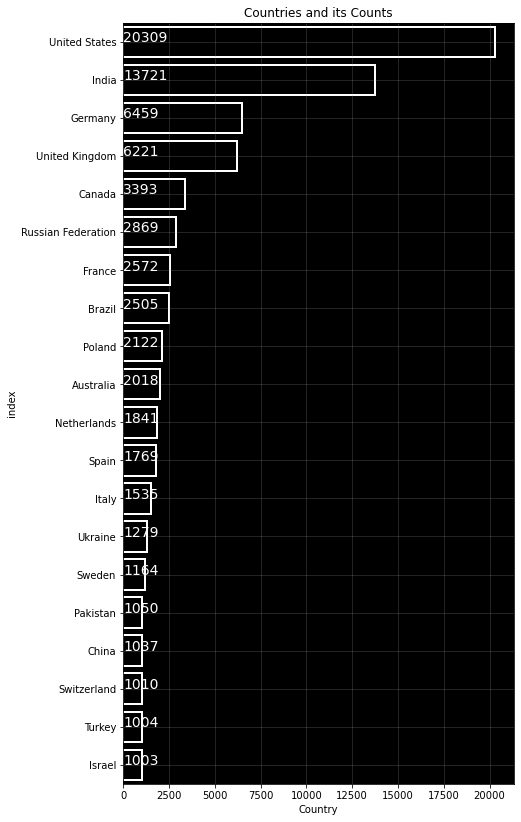

In [18]:
emp=survey['Country'].value_counts()[:20].reset_index()
pl.figure(figsize=(7,14))
ax=sns.barplot(y='index',x='Country',
              data=emp,
              edgecolor='white',
              linewidth=2,
              color='k')
ax.set_facecolor('k')
for i,j in enumerate(emp['Country'].round(2)):
    ax.text(0,i,j,
           fontsize=14,
           color='white')
pl.grid(alpha=.25)
pl.title('Countries and its Counts')
pl.show()

In [19]:
emp

,index,Country
0,United States,20309
1,India,13721
2,Germany,6459
3,United Kingdom,6221
4,Canada,3393
5,Russian Federation,2869
6,France,2572
7,Brazil,2505
8,Poland,2122
9,Australia,2018


<Figure size 432x288 with 0 Axes>

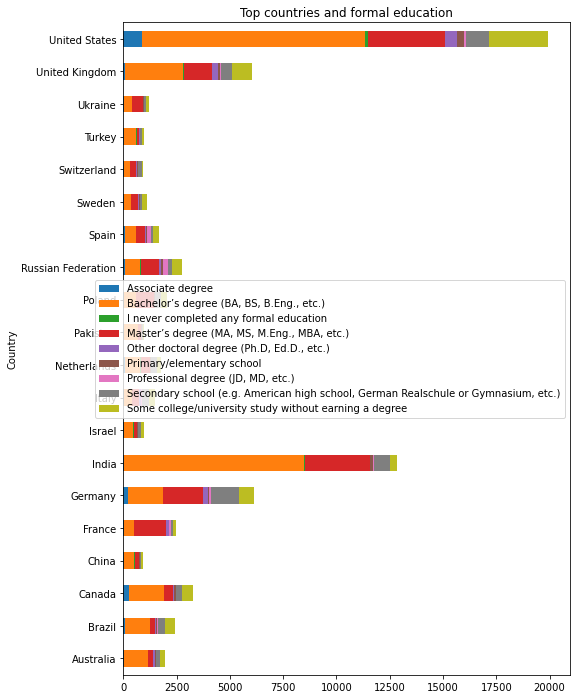

In [20]:
pl.figure()
cou=emp['index'].tolist()
top_c=survey[survey['Country'].isin(cou) ]
top_c
ax=pd.crosstab(top_c['Country'],top_c['FormalEducation']).plot(kind='barh',
                                                            stacked=True,
                                                        figsize=(8,12)
                                                            )
ax.legend(loc='center right')
ax.set_title('Top countries and formal education')
pl.show()

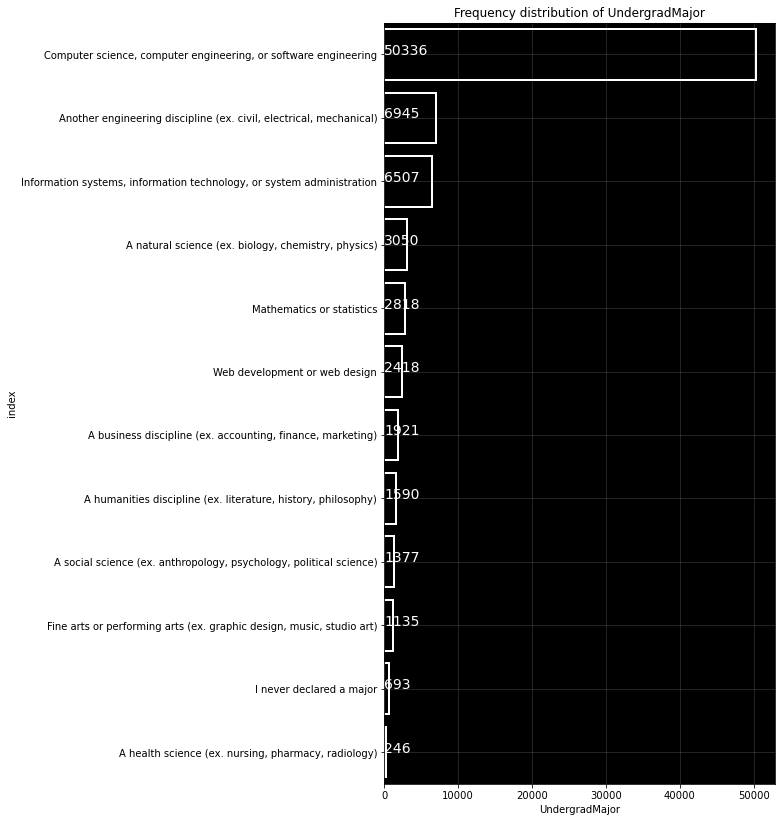

In [21]:
emp=survey['UndergradMajor'].value_counts()[:20].reset_index()
pl.figure(figsize=(7,14))
ax=sns.barplot(y='index',x='UndergradMajor',
              data=emp,
              edgecolor='white',
              linewidth=2,
              color='k')
ax.set_facecolor('k')
for i,j in enumerate(emp['UndergradMajor'].round(2)):
    ax.text(0,i,j,
           fontsize=14,
           color='white')
pl.grid(alpha=.25)
pl.title('Frequency distribution of UndergradMajor')
pl.show()

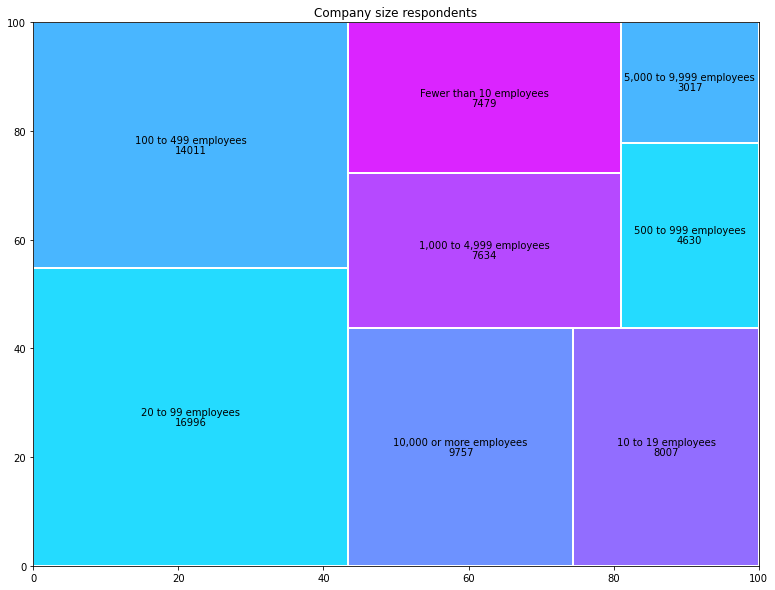

In [22]:
import squarify
pl.figure(figsize=(13,10))

squarify.plot(sizes=survey['CompanySize'].value_counts().values,
             value=survey['CompanySize'].value_counts().values,
             label=survey['CompanySize'].value_counts().keys(),
              linewidth=2,
              edgecolor='white',
              color=sns.color_palette('cool'),
             )
pl.title('Company size respondents')
pl.show()

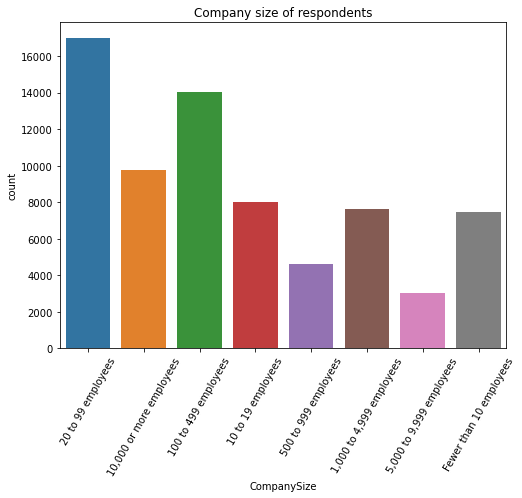

In [23]:
pl.figure(figsize=(8,6))
sns.countplot(survey['CompanySize'])
pl.title('Company size of respondents')
pl.xticks(rotation=60)
pl.show()


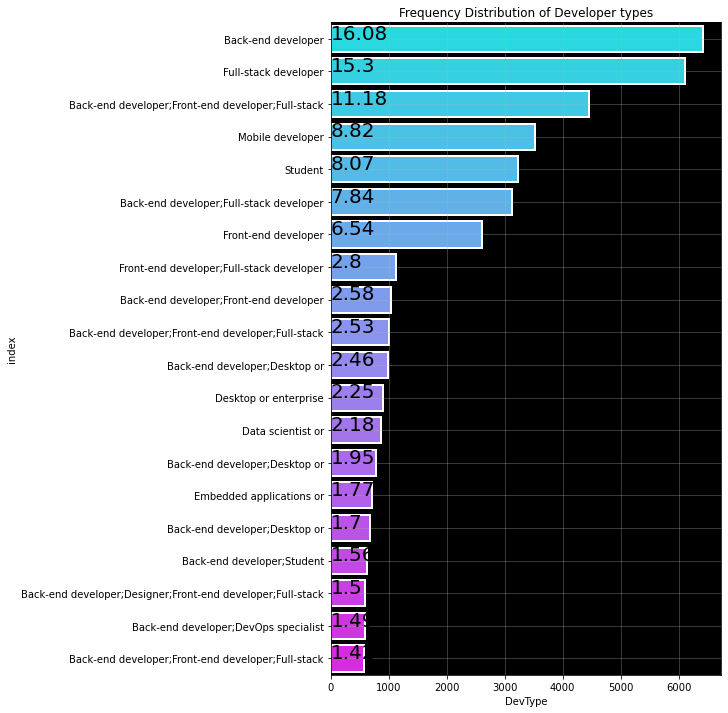

In [24]:
emp=survey['DevType'].value_counts()[:20].reset_index()
emp['perct']=emp['DevType']*100/emp['DevType'].sum()
pl.figure(figsize=(7,12))
ax=sns.barplot(y='index',x='DevType',
              data=emp,
              edgecolor='white',
              linewidth=2,
              palette='cool')
ax.set_facecolor('k')
for i,j in enumerate(emp['perct'].round(2)):
    ax.text(0,i,j,
           fontsize=20)
pl.grid(alpha=.4)
keys=[]
for i in emp['index']:
    i=i.split()
    i=i[:3]
    i=' '.join(i)
    keys.append(i)
ax.set(yticklabels=list(keys))
pl.title('Frequency Distribution of Developer types')
pl.show()

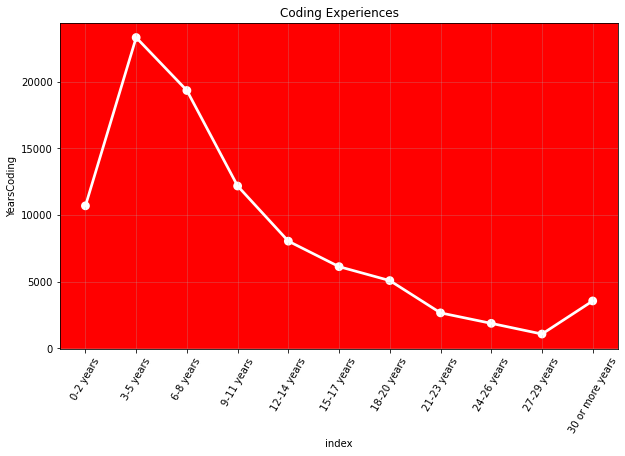

In [25]:
pl.figure(figsize=(10,6))
temp=survey['YearsCoding'].value_counts().reset_index()
order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years',  '12-14 years','15-17 years', 
         '18-20 years', '21-23 years','24-26 years', '27-29 years','30 or more years']
ax=sns.pointplot(temp['index'],temp['YearsCoding'],order=order,
                color='w')
ax.set_facecolor('red')
pl.xticks(rotation=60)
pl.grid(alpha=.3)
pl.title('Coding Experiences')
pl.show()

In [26]:
pl.figure(figsize=(10,7))
sns.heatmap(pd.crosstab(survey['YearsCoding'],survey['FormalEducation']),
           annot=True,
           fmt='.2f',
           edgecolor='w',
           linewidth=1,
           cmap=sns.color_palette("cool")
           )
pl.

SyntaxError: invalid syntax (<ipython-input-26-f457ad616d1b>, line 9)

In [ ]:
pl.figure(figsize=(10,6))
temp=survey['YearsCodingProf'].value_counts().reset_index()
order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years',  '12-14 years','15-17 years', 
         '18-20 years', '21-23 years','24-26 years', '27-29 years','30 or more years']
ax=sns.pointplot(temp['index'],temp['YearsCodingProf'],order=order,
                color='w')
ax.set_facecolor('red')
pl.xticks(rotation=60)
pl.grid(alpha=.3)
pl.title('Professional Coding Experiences')
pl.show()

In [ ]:
draw=pd.crosstab(survey['Country'],survey['YearsCoding']).reset_index()
order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years',  '12-14 years','15-17 years', 
         '18-20 years', '21-23 years','24-26 years', '27-29 years','30 or more years']

length = len(order)
fig=pl.figure(figsize=(13,26))
fig.set_facecolor('lightgrey')
for i,j in itertools.zip_longest(order,range(length)):
    pl.subplot(5,3,j+1)
    ax=sns.barplot('Country',i,
               data=draw.sort_values(by=i,
                ascending=False)[:3])
    ax.set_facecolor('k')
    pl.grid(alpha=.3)
    pl.ylabel("")
    pl.xlabel("")
    pl.title(i,color='r',fontsize=15)
    
pl.show()